# Operation Research:An Introduction

Bu çalışma operation research kapsamında konulara ilşikin soru ve çözümlerine yer veren kapsamlı bir çalışma olması amacı ile hazırlanmıştır.Bu çalışmadaki içerik *Operation Research:An Introduction* kitabında yer alan sorular ve bunlar ailşikin çözümleri barındırır.

__author__ = "Merve Nur Özdemir"
__version__ = "1.0"
__email__ = "demirmerwenur@gmail.com"

## Linear Programming

## Contents 
1. [Two variable LP Model](#Two_variable_LP_Model)
1. [Graphical LP Solution](#Graphical_LP_Solution)
1. [ LP Applicaitons](#LP_Applicaitons)
1. [The Simplex Method and Sensitivity Analysis](#The_Simplex_Method_and_Sensitivity_Analysis)
1. [Duality and Post-Optimal Analysis](#Duality_and_PostOptimal_Analysis)
1. [Trasnportaiton Model and Its Variants](#Trasnportaiton_Model_and_Its_Variants)
1. [Advance Linear Programming](#Advance_Linear_Programming)
1. [Goal Programming](#Goal_Programming)
1. [Integer Linear Programming](#Integer_Linear_Programming)
1. [Deterministic Dynamic Programming](#Deterministic_Dynamic_Programming)
1. [Decision Analysis and Games](#Decision_Analysis_and_Games)


###  Two variable LP Model
#### Solution of maximizing model

**<font color=red>*Question-1*</font>**

A company that operates 10 hours a day manufactures two products on tree sequential processes.The following table summarizes the data of the problem: (Ps Processes represent minutes per unit)

|Product |Process 1|Process 2|Process 3|Unit Profit|
|--------|---------|---------|---------|-----------|
|1|10|6|8|2 dolar|
|2|5|20|10|3 dolar|

Determine the optimal mix of the two products.

**<font color=red>*Answer*</font>**


In [47]:
#import sys !{sys.executable} -m pip install pulp
# import the library pulp as p
import pulp as p
  
# Create a LP Minimization problem
Lp_prob = p.LpProblem('Problem', p.LpMaximize) 
  
# Create problem Variables 
x_1 = p.LpVariable("x_1", lowBound = 0)   # Create a variable x >= 0
x_2 = p.LpVariable("x_2", lowBound = 0)   # Create a variable y >= 0
  
# Objective Function
Lp_prob += 2 * x_1 + 3 * x_2   
  
# Constraints:
Lp_prob += 2 * x_1+ 3 * x_2 >= 12
Lp_prob += 10*x_1 + 5*x_2 <= 600
Lp_prob += 6*x_1 + 20*x_2 <= 600
Lp_prob +=  8*x_1 + 10*x_2 <= 600
  
# Display the problem
print(Lp_prob)
  
status = Lp_prob.solve()   # Solver
print(p.LpStatus[status])   # The solution status
  
    
# Printing the final solution
print("x_1=",p.value(x_1),"x_2=", p.value(x_2), "z=",p.value(Lp_prob.objective)) 

Problem:
MAXIMIZE
2*x_1 + 3*x_2 + 0
SUBJECT TO
_C1: 2 x_1 + 3 x_2 >= 12

_C2: 10 x_1 + 5 x_2 <= 600

_C3: 6 x_1 + 20 x_2 <= 600

_C4: 8 x_1 + 10 x_2 <= 600

VARIABLES
x_1 Continuous
x_2 Continuous

Optimal
x_1= 52.941176 x_2= 14.117647 z= 148.235293


**<font color=red>*Question-2*</font>** <br>
An individual wishes to invest $5000 over the next year in two types of investment:investment yield %5 and investment B yield %8 Market research recommend an allocaiton of at least %25 in A and at most %50 in B More over investment in A should be at least half in the investment in B.How should the found allocated the two investments?

**<font color=red>*Answer-2*</font>** <br>

In [48]:
#import sys !{sys.executable} -m pip install pulp
# import the library pulp as p
import pulp as p
  
# Create a LP Minimization problem
Lp_prob = p.LpProblem('İnvestment_Problem', p.LpMaximize) 
  
# Create problem Variables 
x_1 = p.LpVariable("x_1", lowBound = 0)   # Create a variable x >= 0 dolar invested in A
x_2 = p.LpVariable("x_2", lowBound = 0)   # Create a variable y >= 0 dolar invested in B
  
# Objective Function
Lp_prob += 0.05 * x_1 + 0.08 * x_2   
  
# Constraints:
Lp_prob += x_1>= 0.25*(x_1+x_2)
Lp_prob += x_2 <= 0.5*(x_1+x_2)
Lp_prob += 2*x_1 >= x_2 
Lp_prob += x_1 +x_2 <= 5000

  
# Display the problem
print(Lp_prob)
  
status = Lp_prob.solve()   # Solver
print(p.LpStatus[status])   # The solution status
  
    
# Printing the final solution
print("x_1=",p.value(x_1),"x_2=", p.value(x_2), "z=",p.value(Lp_prob.objective)) 

İnvestment_Problem:
MAXIMIZE
0.05*x_1 + 0.08*x_2 + 0.0
SUBJECT TO
_C1: 0.75 x_1 - 0.25 x_2 >= 0

_C2: - 0.5 x_1 + 0.5 x_2 <= 0

_C3: 2 x_1 - x_2 >= 0

_C4: x_1 + x_2 <= 5000

VARIABLES
x_1 Continuous
x_2 Continuous

Optimal
x_1= 2500.0 x_2= 2500.0 z= 325.0


### Graphical LP Solution
The graphical soluiton includes two steps:
1. Determination of the feasible solution space
2. Determination of th eoptimum solution from among all the feasible points in the soluiton space

In [49]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
%matplotlib inline

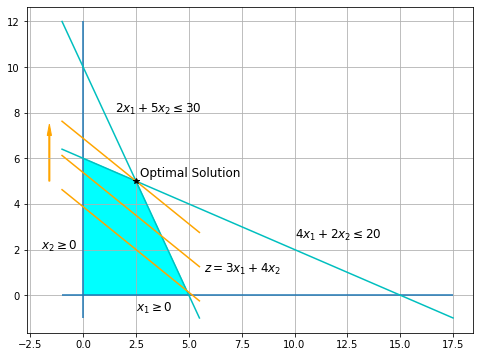

In [50]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid()

# Draw constraint lines
ax.hlines(0, -1, 17.5)
ax.vlines(0, -1, 12)
ax.plot(np.linspace(-1, 17.5, 100), 6-0.4*np.linspace(-1, 17.5, 100), color="c")
ax.plot(np.linspace(-1, 5.5, 100), 10-2*np.linspace(-1, 5.5, 100), color="c")
ax.text(1.5, 8, "$2x_1 + 5x_2 \leq 30$", size=12)
ax.text(10, 2.5, "$4x_1 + 2x_2 \leq 20$", size=12)
ax.text(-2, 2, "$x_2 \geq 0$", size=12)
ax.text(2.5, -0.7, "$x_1 \geq 0$", size=12)

# Draw the feasible region
feasible_set = Polygon(np.array([[0, 0], 
                                 [0, 6], 
                                 [2.5, 5], 
                                 [5, 0]]), 
                       color="cyan")
ax.add_patch(feasible_set)

# Draw the objective function
ax.plot(np.linspace(-1, 5.5, 100), 3.875-0.75*np.linspace(-1, 5.5, 100), color="orange")
ax.plot(np.linspace(-1, 5.5, 100), 5.375-0.75*np.linspace(-1, 5.5, 100), color="orange")
ax.plot(np.linspace(-1, 5.5, 100), 6.875-0.75*np.linspace(-1, 5.5, 100), color="orange")
ax.arrow(-1.6, 5, 0, 2, width = 0.05, head_width=0.2, head_length=0.5, color="orange")
ax.text(5.7, 1, "$z = 3x_1 + 4x_2$", size=12)

# Draw the optimal solution
ax.plot(2.5, 5, "*", color="black")
ax.text(2.7, 5.2, "Optimal Solution", size=12)

plt.show()

Text(0, 0.5, '$y$')

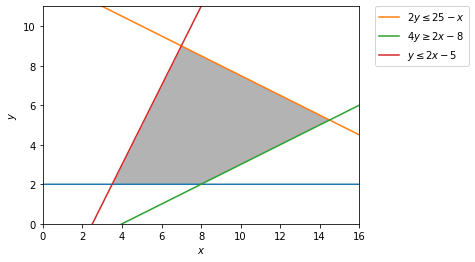

In [51]:
### alternative
# plot the feasible region
d = np.linspace(-2,16,300)
x,y = np.meshgrid(d,d)
plt.imshow( ((y>=2) & (2*y<=25-x) & (4*y>=2*x-8) & (y<=2*x-5)).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);


# plot the lines defining the constraints
x = np.linspace(0, 16, 2000)
# y >= 2
y1 = (x*0) + 2
# 2y <= 25 - x
y2 = (25-x)/2.0
# 4y >= 2x - 8 
y3 = (2*x-8)/4.0
# y <= 2x - 5 
y4 = 2 * x -5

# Make plot
plt.plot(x, 2*np.ones_like(y1))
plt.plot(x, y2, label=r'$2y\leq25-x$')
plt.plot(x, y3, label=r'$4y\geq 2x - 8$')
plt.plot(x, y4, label=r'$y\leq 2x-5$')
plt.xlim(0,16)
plt.ylim(0,11)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

#### Solution of minimizing model

**<font color=red>*Question-3*</font>** <br>
Ozark farm uses at least 800 ıb of special feed daily.The special feed is a mixture of corn and soybean meal with the following compositions:
     <br>Ib per Ib of feedstuff <br>
   
|Feedstuff |Protein |Fiber |Cost|
|----------|--------|------|----|
|`Corn`|.09|.02|.30|
|`Soybean`|.60|.06|.90|  

<br>
   The diatery requirements of special feed are at least 30% protein and at most %5 fiber .Ozark farms wishes to determine the daily minimum cost.
    
**<font color=red>*Answer-3*</font>** <br>

In [52]:
#import sys !{sys.executable} -m pip install pulp
# import the library pulp as p
import pulp as p
  
# Create a LP Minimization problem
Lp_prob = p.LpProblem('Mixed_Problem', p.LpMinimize) 
  
# Create problem Variables 
x_1 = p.LpVariable("x_1", lowBound = 0)   # Create a variable x >= 0 dolar invested in A
x_2 = p.LpVariable("x_2", lowBound = 0)   # Create a variable y >= 0 dolar invested in B
  
# Objective Function
Lp_prob += 0.30 * x_1 + 0.90 * x_2   
  
# Constraints:
Lp_prob += .09*x_1 + .60*x_2>= 0.3*(x_1+x_2)
Lp_prob += .02*x_1 + .06*x_2<= 0.05*(x_1+x_2)
Lp_prob += (x_1+x_2) >=800

  
# Display the problem
print(Lp_prob)
  
status = Lp_prob.solve()   # Solver
print(p.LpStatus[status])   # The solution status
  
    
# Printing the final solution
print("x_1=",p.value(x_1),"x_2=", p.value(x_2), "z=",p.value(Lp_prob.objective)) 

Mixed_Problem:
MINIMIZE
0.3*x_1 + 0.9*x_2 + 0.0
SUBJECT TO
_C1: - 0.21 x_1 + 0.3 x_2 >= 0

_C2: - 0.03 x_1 + 0.01 x_2 <= 0

_C3: x_1 + x_2 >= 800

VARIABLES
x_1 Continuous
x_2 Continuous

Optimal
x_1= 470.58824 x_2= 329.41176 z= 437.647056


### LP Applicaitons
1. [Urban planing](#Urban_planing)
2. [Currency Arbitrage](#Currency_Arbitrage)
3. [Investment](#Investment)
4. [Production Planning and Inventory Control](#Production_Planning_and_Inventory_Control)
5. [Blending and Refining](#Blending_and_Refining)
6. [Manpower Planning](#Manpower_Planning)
7. [Additional Applicaitons](#Additional_Applicaitons)


#### Urban planing <a name="Urban_planing"></a>
**<font color=red>*Question-4*</font>** <br>
The city Erstville is faced with severe budget shortage.Seeking a long term solution, the city council votes to improve the tax base by condeming an inner city housing area and replace it with a modern development.

The project involves two phases:(1) demolishing substandard houses to provide land for the new development , and (2) building the new development.The following is a summary of the situation.

1. As many as 300 substandard houses can be demolished.Each house occupies a 25-acre lot.The cost of demolishing a condemned house is 2000 dolar
2. Lot sizes for new single-double-triple and quadruple family homes(units)are .18-.28-.4and .5 acre, respectively.Streets, open space and utiliy asements account for 15% of avaliable
3. In the new development the triple and quadruple units account for at least 25% of the total.Single units must be at least 20% of all units and double units is $1000, $1900 , $2700 and $3400, respectively.
4. the tax levied per unit for single-double-triple and quadruple units family homes is $50.000, $70.000,$130.000,$160.000 repectively.Financing throuhg a local bank can amount to a maximum of $15 million.

How many units of each type should be constructed to maximize tax colleciton.

**<font color=red>*Answer-4*</font>** <br>

The variables of the problem can be defined as: 
- x_1 = Number of units of single family homes.
- x_2 = Number of units of double family homes.
- x_3 = Number of units of triple family homes.
- x_4 = Number of units of quadruple family homes.
- x_5 = Number of old homes to be demolished.

In [53]:
#import sys !{sys.executable} -m pip install pulp
# import the library pulp as p
import pulp as p
  
# Create a LP Maximizaiton problem
Lp_prob = p.LpProblem('Urban_planing', p.LpMaximize) 
  
# Create problem Variables 
x_1 = p.LpVariable("x_1", lowBound = 0)  
x_2 = p.LpVariable("x_2", lowBound = 0)   
x_3 = p.LpVariable("x_3", lowBound = 0)  
x_4 = p.LpVariable("x_4", lowBound = 0) 
x_5 = p.LpVariable("x_5", lowBound = 0)  

  
# Objective Function
Lp_prob += 1000* x_1 + 1900 * x_2   + 2700 * x_3   + 3400 * x_4  
  
# Constraints:
# The first constraint of the problem deals with land avalibility %15 open streets and easment , the net acrega avalible is .85*(.25*x_5) =.2125*x_5
Lp_prob += 0.18*x_1+0.28*x_2+0.4*x_3+0.5*x_4 <=0.2125*x_5
Lp_prob += x_5<=300
Lp_prob += -0.8*x_1+0.2*x_2+0.2*x_3+0.2*x_4 <=0
Lp_prob += 0.1*x_1-0.9*x_2+0.1*x_3+0.1*x_4<=0
Lp_prob += 0.25*x_1+0.25*x_2-0.75*x_3-0.75*x_4<= 0
Lp_prob += 50*x_1+70*x_2+130*x_3+160*x_4+2*x_5<= 15000
  
# Display the problem
print(Lp_prob)
  
status = Lp_prob.solve()   # Solver
print(p.LpStatus[status])   # The solution status
  
    
# Printing the final solution
print("x_1=",p.value(x_1),"x_2=", p.value(x_2), "x_3=",p.value(x_3),"x_4=", p.value(x_4),"x_5=", p.value(x_5), "z=",p.value(Lp_prob.objective)) 

Urban_planing:
MAXIMIZE
1000*x_1 + 1900*x_2 + 2700*x_3 + 3400*x_4 + 0
SUBJECT TO
_C1: 0.18 x_1 + 0.28 x_2 + 0.4 x_3 + 0.5 x_4 - 0.2125 x_5 <= 0

_C2: x_5 <= 300

_C3: - 0.8 x_1 + 0.2 x_2 + 0.2 x_3 + 0.2 x_4 <= 0

_C4: 0.1 x_1 - 0.9 x_2 + 0.1 x_3 + 0.1 x_4 <= 0

_C5: 0.25 x_1 + 0.25 x_2 - 0.75 x_3 - 0.75 x_4 <= 0

_C6: 50 x_1 + 70 x_2 + 130 x_3 + 160 x_4 + 2 x_5 <= 15000

VARIABLES
x_1 Continuous
x_2 Continuous
x_3 Continuous
x_4 Continuous
x_5 Continuous

Optimal
x_1= 35.829704 x_2= 98.531685 x_3= 44.787129 x_4= 0.0 x_5= 244.48504 z= 343965.1538


**<font color=red>*Question-5*</font>** <br>
A city will undertake five urban renewal housing projects over the next five years.Each project has a different starating year and a differenet duraiton.The following table  provides the basic data of the situation.

|  |Year 1 |Year 2 |Year 3 |Year 4 |Year 5 |Cost|Annual Income |
|--|-------|-------|-------|-------|-------|----|--------------|
|`Project 1`|Start||End|||5.0|.05|
|`Project 2`||Start|||End|8.0|.07|
|`Project 3`|Start||||End|15.0|.15|
|`Project 4`|||Start|End||1.2|.02|
|`Budget`|3|6|7|7|7|||

Project 1 and 4 must be finished completely within their duraitons.The remaining two projects can be finished partially eithin budget limitaitons, İf necessary.However, each project must be at least 25% completed within its duraiton.At the end of the each year, the comleted section of a project is immediately occupied by tenants and a proportial amount of the in come realized.For examplei if 40% of th eproject 1 completedin year 1 and 60% in year 3, the associated income over the five year planning horizon is .4*50.000 dolar(for year2) + .4*50.000 dolar(for year3)+(.4+.6)*50.000 dolar(for year4) +(.4+.6)*50.000 dolar(for year5) =(4*.4+2*.6)*50.000 dolar <br>
Determine the optimal schedule for the projects that will maximize the total income over the five-year horizon.For simplicity,diregard the time value of money.

**<font color=red>*Answer-5*</font>** <br>


Portion of project i completed in year j: $$X_{ij}$$ 


**<font color=cyan>*Çözüm için devam edeceğim*</font>** <br>

In [ ]:
#import sys !{sys.executable} -m pip install pulp
# import the library pulp as p
import pulp as p
  
# Create a LP Maximizaiton problem
Lp_prob = p.LpProblem('Urban_planing', p.LpMaximize) 
  
# Create problem Variables 
x_1 = p.LpVariable("x_1", lowBound = 0)  
x_2 = p.LpVariable("x_2", lowBound = 0)   
x_3 = p.LpVariable("x_3", lowBound = 0)  
x_4 = p.LpVariable("x_4", lowBound = 0) 
 

  
# Objective Function
Lp_prob +=0.5() 1000* x_1 + 1900 * x_2   + 2700 * x_3   + 3400 * x_4  
  
# Constraints:
# The first constraint of the problem deals with land avalibility %15 open streets and easment , the net acrega avalible is .85*(.25*x_5) =.2125*x_5
Lp_prob += 0.18*x_1+0.28*x_2+0.4*x_3+0.5*x_4 <=0.2125*x_5
Lp_prob += x_5<=300
Lp_prob += -0.8*x_1+0.2*x_2+0.2*x_3+0.2*x_4 <=0
Lp_prob += 0.1*x_1-0.9*x_2+0.1*x_3+0.1*x_4<=0
Lp_prob += 0.25*x_1+0.25*x_2-0.75*x_3-0.75*x_4<= 0
Lp_prob += 50*x_1+70*x_2+130*x_3+160*x_4+2*x_5<= 15000
  
# Display the problem
print(Lp_prob)
  
status = Lp_prob.solve()   # Solver
print(p.LpStatus[status])   # The solution status
  
    
# Printing the final solution
print("x_1=",p.value(x_1),"x_2=", p.value(x_2), "x_3=",p.value(x_3),"x_4=", p.value(x_4),"x_5=", p.value(x_5), "z=",p.value(Lp_prob.objective)) 

#### Currency Arbitrage <a name="Currency_Arbitrage"></a>

#### Investment <a name="Investment"></a>
**<font color=red>*Question-4*</font>** <br>
Thriftem Bank is in the process of devising a loan poilcy that involves a maximum of $$12 million.The following table provides the pertinent data about avaliable types of loans.

|Type of loan |Interest Rate |Bad-dept Ratio |
|-------------|--------------|---------------|
|Personal|.140|.10|
|Car|.130|.07| 
|Home|.120|.03|
|Farm|.125|.05| 
|Commercial|.100|.02|

Bad debts are unrecoverable and produce no interest revenue.Competition with other financial institutiıns requires that bank allocate at least 40% of the funds to farm and commercial loans.To assit the housing industy in the region, home loans must equal at least 50% of the personal,car and home loans.The bank also has a stated polciy of not allowing the overall ratio of band debts on all loans to exeed 4%.

The variables of the problem can be defined as: 
- x_1 = Personal loans (in millionds of dollars)
- x_2 = Car loans
- x_3 = Home loans
- x_4 = Farm loans
- x_5 = Commercial loans


In [54]:
#import sys !{sys.executable} -m pip install pulp
# import the library pulp as p
import pulp as p
  
# Create a LP Maximizaiton problem
Lp_prob = p.LpProblem('Investment', p.LpMaximize) 
  
# Create problem Variables 
x_1 = p.LpVariable("x_1", lowBound = 0)  
x_2 = p.LpVariable("x_2", lowBound = 0)   
x_3 = p.LpVariable("x_3", lowBound = 0)  
x_4 = p.LpVariable("x_4", lowBound = 0) 
x_5 = p.LpVariable("x_5", lowBound = 0)  

  
# Objective Function (Maximiza total interest - bad debt)
#Lp_prob += 0.14*(0.9*x_1)+0.13*(0.93*x_2)+0.12*(0.97*x_3)+0.125*(0.95*x_4)+0.1*(0.98*x_5)-(0.1*x_1+0.07*x_2+0.03*x_3+0.05x_4+0.02*x_5)
Lp_prob += 0.026*x_1+0.509*x_2+0.0864*x_3+0.06875*x_4+0.078*x_5
# Constraints:
# Total funds should not exceed $$12 milllion:
Lp_prob += x_1+x_2+x_3+x_4+x_5 <=12
# Farm and commercial loans equal at least 40% of all loans
Lp_prob += x_4+x_5>=0.4*(x_1+x_2+x_3+x_4+x_5)
# Home loans should equal at least 50% of personal,car,and home loans
Lp_prob += x_3>=0.5*(x_1+x_2+x_3)
# Bad depts should not exceed 4% of all loans
Lp_prob += 0.1*x_1+0.07*x_2+0.03*x_3+0.05*x_4+0.02*x_5<=0.04*(x_1+x_2+x_3+x_4+x_5)

  
# Display the problem
print(Lp_prob)
  
status = Lp_prob.solve()   # Solver
print(p.LpStatus[status])   # The solution status
  
    
# Printing the final solution
print("x_1=",p.value(x_1),"x_2=", p.value(x_2), "x_3=",p.value(x_3),"x_4=", p.value(x_4),"x_5=", p.value(x_5), "z=",p.value(Lp_prob.objective)) 

Investment:
MAXIMIZE
0.026*x_1 + 0.509*x_2 + 0.0864*x_3 + 0.06875*x_4 + 0.078*x_5 + 0.0
SUBJECT TO
_C1: x_1 + x_2 + x_3 + x_4 + x_5 <= 12

_C2: - 0.4 x_1 - 0.4 x_2 - 0.4 x_3 + 0.6 x_4 + 0.6 x_5 >= 0

_C3: - 0.5 x_1 - 0.5 x_2 + 0.5 x_3 >= 0

_C4: 0.06 x_1 + 0.03 x_2 - 0.01 x_3 + 0.01 x_4 - 0.02 x_5 <= 0

VARIABLES
x_1 Continuous
x_2 Continuous
x_3 Continuous
x_4 Continuous
x_5 Continuous

Optimal
x_1= 0.0 x_2= 3.6 x_3= 3.6 x_4= 0.0 x_5= 4.8 z= 2.51784


####  Production_Planning_and_Inventory_ControlArbitrage <a name="Production_Planning_and_Inventory_Control"></a>

####  Blending_and_Refining <a name="Blending_and_Refining"></a>

####  Manpower_Planning <a name="Manpower_Planning"></a>

#### Additional_Applicaitons  <a name="Additional_Applicaitons"></a>

## The Simplex Method and Sensitivity Analysis

bu örneği al ve değiştirerek uygulam 

Python implementation of the two phase simplex method within linear programming using Bland's rule

The algorithm will provide one of three solutions - a bounded solution, no solution, or an infinite (unbounded) solution.

The program takes the following variables:
int n: number of inequality equations
int m: total variables
list a: coefficients of inequality equations in a list of list
list b: maximums for each of the inqualities
list c: coefficients of the optimization function

Example Problem:
x + y - 3z <= 10
5x + 10y <= -50
3x - 2y -4z <= 9
Maximize: -x - 6y - 3z

You would enter the following within the input prompt:
3 3
1 1 -3
-5 10 0
3 -2 -4
10 -50 9
-1 -6 -3

Bounded Solution: 10.000 0.000 5.250

###  Simplex Algorithm Example of Reddy Miks

### Summary of simplex method
The steps of the simplex method
1. Determine a starting basic feasible solution.
2. Select an entering variable using th eoptimality condition.Stop if there is no entering variable the last soluiton is optimal.Else go to step 3.
3. Select a leaving variable using the feasibility condition.
4. Determine the new basic soluiton by using the appropriate Gauss-Jordan computations. Go to Step 2.

### Sensitivity Analysis
Deals with detemrining the conditions that will keep the current solution unchanged.

###  Artificial Starting Solution

####  Big M method

#### Special Cases in Simplex Method
1. Degenerancy
2. Alternative Optima
3. Unbounded Soluitions
4. Non Existing or infeasible soluitons


## Network Models

## Duality and Post-Optimal Analysis

Post-Optimal analaysis which deals with finding a new optimal soluiton when the data of the model are changed.

## Trasnportaiton Model and Its Variants

### Scope and Definition of Network Models
A multitude of operations research situations can be modeled and solved as networks. 
1. Design of an offshore natural-gas pipeline network connecting well heads in the Gulf of Mexico to an inshore delivery point.The objective of the model is to minimize the cost od construction the pipeline.
2. Determination of the shortest route between two cities in existing network of roads
3. Determinaiton of the maximum capatiy of coal slurry pipeline network joining coal mines.
4. Determination of the time schedule for the activities of construction project
5. Determination of the minimum -cost flow schedule from oil fields to refineries though a pipeline network.

The solution of these and algortihms <br>
- Minimal spanning tree (for 1) <br>
- Shortest-path algortihm (for 2) <br>
- Maximal-flow algorithm (for 3) <br>
- Critical path (CPM)algorithm (for 4)


## Advance Linear Programming

### Simplex Method

### Revised Simplex Method

## Goal Programming

### Goal Programing Algorithms
1. The Weight Method
2. The Preemptive Method

## Integer Linear Programming

### Capital Budgeting Problem

### Set Covering Problem

### Fixed - Charge Problem

###  Job Sequencing Model

### Branch-and-bound Algoritm

### Cutting-plane method

### Traveling Sales man Problem

### Heuristic Algorihms
1. The Nearest-Neighbor Heuristics
2. Subtour Reversal Heuristics


## Deterministic Dynamic Programming

### Knapsack/Flay-away/Cargo-Loading Model
### Work Force Size Model
### Equipment Replacement Model
### Investment Model
### Inventory Models

## Decision Analysis and Games

### Decision Making Under Certainty - Analytic Hierarchy Process (AHP)
### Decision Making Under Risk
### Decision Under Uncertainty


## Nonlinear Programming Algorithms
### Unconstrained Algoritms
#### Direct Search Method


## Facility Plannig 
#tompkins|white|bozer|tanchoco